<a href="https://colab.research.google.com/github/annkvth/kompleteNetze/blob/main/05_plot_csvs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from datetime import datetime, timedelta
import pandas as pd
import networkx as nx
from functools import partialmethod
from google.colab import drive
import os
import glob
from traffic.data import airports
import altair as alt
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox


define lists of airports with more than 50k passengers


In [18]:
# Deutschland
icaolistD=["EDDB", "EDVE", "EDDW", "EDLW", "EDDC", "EDDL", "EDDE", "EDDF", "EDFH", "EDNY", "EDDH", "EDDV", "EDSB", "EDVK", "EDDK", "EDDP", "EDHL", "EDJA", "EDDM", "EDDG", "EDLV", "EDDN", "EDLP", "ETNL", "EDDR", "EDDS", "EDXW"]
markerD='o-'
colorD='red'

# Italien
icaolistI=["LIRF", "LIMC", "LIME", "LIRN", "LIPZ", "LICC", "LIPE", "LIML", "LICJ", "LIBD", "LIRP", "LIEE", "LIMF", "LIRA", "LIPX", "LIEO", "LIBR", "LIRQ", "LIPH", "LICA", "LIEA", "LICT", "LIMJ", "LIPQ", "LIBP", "LIRZ", "LIPY", "LICD", "LICB", "LICR", "LIPR", "LIBC", "LIPK", "LIMP", "LIMZ", "LICG"]
markerI='v-'
colorI='firebrick'

# Spanien - die, die nicht mit LE anfangen, sind abseits des Festlands, vor allem Canaren
icaolistS=["LEZL", "LEZG", "LEXJ", "LEVX", "LEVT", "LEVD", "LEVC", "LEST", "LESO", "LERS", "LEPP", "LEPA", "LEMI", "LEMH", "LEMG", "LEMD", "LELN", "LEJR", "LEIB", "LEGR", "LEGE", "LECO", "LEBZ", "LEBL", "LEBB", "LEAS", "LEAM", "LEAL", "GEML", "GCXO", "GCTS", "GCRR", "GCLP", "GCLA", "GCHI", "GCGM", "GCFV"]
markerS='d-'
colorS='peru'

# Frankreich - alles was nicht LF ist ist Übersee
icaolistF=["LFBD", "LFBE", "LFBH", "LFBL", "LFBO", "LFBP", "LFBT", "LFBZ", "LFGJ", "LFJL", "LFKB", "LFKC", "LFKF", "LFKJ", "LFLB", "LFLC", "LFLL", "LFLS", "LFMK", "LFML", "LFMN", "LFMP", "LFMT", "LFMU", "LFOB", "LFOT", "LFPB", "LFPG", "LFPO", "LFQQ", "LFRB", "LFRK", "LFRN", "LFRS", "LFSB", "LFST", "LFTH", "LFTW", "NTAA", "NTTB", "NTTG", "NTTH", "NTTR", "NWWL", "NWWM", "NWWW", "SOCA", "TFFF", "TFFG", "TFFJ", "TFRR", "FMCZ", "FMEE"]
markerF='^-'
colorF='darkorange'


pick which country to analyse in this runtime

In [51]:
option = 1 # 1=Deutschland, 2=Italien, 3=Spanien, 4=Frankreich
if option == 1:
  icaolist = icaolistD
  countryname = "deutschland"
  markerToUse = markerD
  colorToUse = colorD
elif option == 2:
  icaolist = icaolistI
  countryname = "italien"
  markerToUse = markerI
  colorToUse = colorI
elif option == 3:
  icaolist = icaolistS
  countryname = "spanien"
  markerToUse = markerS
  colorToUse = colorS
elif option  == 4:
  icaolist = icaolistF
  countryname = "frankreich"
  markerToUse = markerF
  colorToUse = colorF


where to read and save the data (and making sure that the directory exist)

In [52]:
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/2024KomplexeNetze/Ergebnisse"
if not os.path.exists(folder_path):
    print(f'No such folder: {folder_path}')
csv_files = sorted(glob.glob(os.path.join(folder_path, f"ir_{countryname}_*.csv")))
print(csv_files)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/ir_deutschland_20241214_032554.csv', '/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/ir_deutschland_20241227_161657.csv', '/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/ir_deutschland_20241227_162724.csv']


Load the csv files into dataframe

In [53]:
# always useful
pd.DataFrame.query = partialmethod(pd.DataFrame.query, engine="python")

In [54]:
# Read CSV files from List
df = pd.concat(map(pd.read_csv, [csv_files[0], csv_files[1]]))
# have a look at the dataframe
df.head()

<ipython-input-54-d955351f0da5>:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(map(pd.read_csv, [csv_files[0], csv_files[1]]))


,Month,WIE,IR,ieflight,neroute,Year
0,1,4.819678,0.662386,47461.0,3526,2018
1,2,4.825629,0.664208,47451.0,3578,2018
2,3,4.847842,0.665649,47453.0,3669,2018
3,4,3.253168,0.691601,49851.0,4406,2018
4,5,3.740522,0.691256,54218.0,5132,2018


Now make some plots of the reults

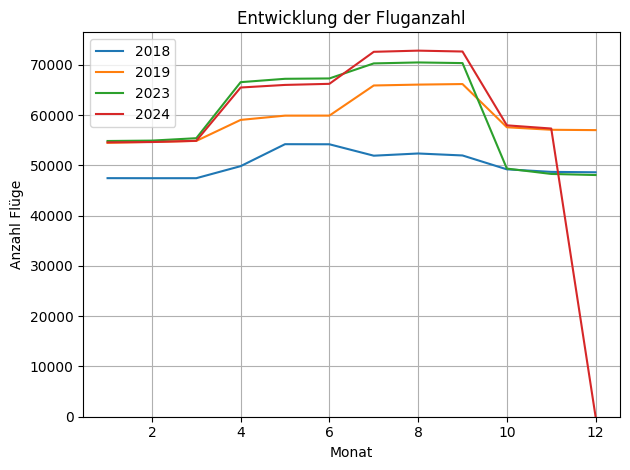

In [55]:
# prompt: make a plot that contains one line for each unique year in the data frame, plotting the column ieflight vs month

import matplotlib.pyplot as plt

# Group data by year
for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Plot ieflight vs. month for the current year
    plt.plot(year_data['Month'], year_data['ieflight'], label=str(year))

# Add labels and title
plt.xlabel('Monat')
plt.ylabel('Anzahl Flüge')
plt.title('Entwicklung der Fluganzahl')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(bottom=0)

filetitle="combi_ieflight"
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}_{timestamp}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}_{timestamp}.svg"
plt.savefig(resultfilename)

plt.show()


Normiert auf 2019 - macht das mehr Sinn?

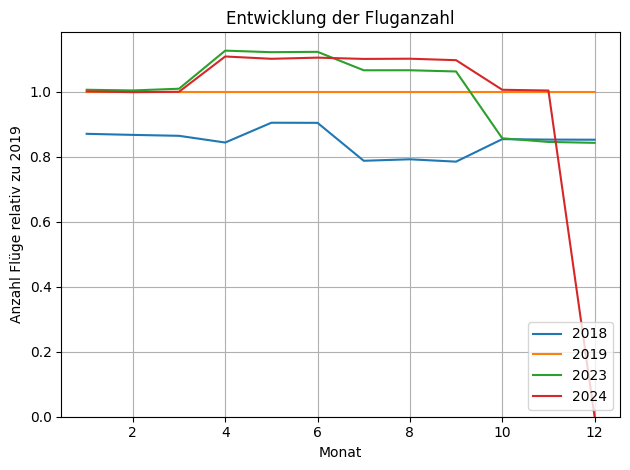

In [56]:
# Find 2019 data
df_2019 = df[df['Year'] == 2019]

# Group data by year
fig, ax = plt.subplots()  # Create a figure and an axes object

for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Normalize 'ieflight' values with respect to 2019 values
    # Match months for normalization
    normalized_ieflight = []
    for month in year_data['Month']:
      try:
          norm_factor = df_2019[df_2019['Month'] == month]['ieflight'].iloc[0]
          if norm_factor != 0:  # avoid division by zero
             normalized_ieflight.append(year_data[year_data['Month'] == month]['ieflight'].iloc[0] / norm_factor)
          else:
              normalized_ieflight.append(0) # or handle the zero case differently
      except IndexError: #handle months that do not exist in 2019 data
          normalized_ieflight.append(0)


    # Plot normalized ieflight vs. month for the current year
    ax.plot(year_data['Month'], normalized_ieflight, label=str(year))

# Add labels and title
ax.set_xlabel('Monat')
ax.set_ylabel('Anzahl Flüge relativ zu 2019')
ax.set_title('Entwicklung der Fluganzahl')
ax.grid(True)
ax.set_ylim(bottom=0)

# Sort legend labels
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1])) # Sort based on year
handles, labels = zip(*sorted_handles_labels)

# Place legend in the bottom right corner
ax.legend(handles, labels, loc='lower right')


plt.tight_layout()

filetitle="combi_ieflight_sorted_legend"
timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}_{timestamp}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}_{timestamp}.svg"
plt.savefig(resultfilename)

plt.show()

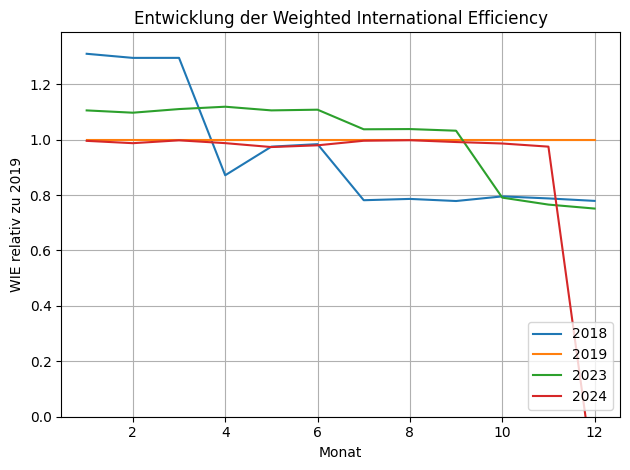

In [57]:
# Group data by year
fig, ax = plt.subplots()  # Create a figure and an axes object

for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Normalize 'WIE' values with respect to 2019 values
    # Match months for normalization
    normalized_WIE = []
    for month in year_data['Month']:
      try:
          norm_factor = df_2019[df_2019['Month'] == month]['WIE'].iloc[0]
          if norm_factor != 0:  # avoid division by zero
             normalized_WIE.append(year_data[year_data['Month'] == month]['WIE'].iloc[0] / norm_factor)
          else:
              normalized_WIE.append(0) # or handle the zero case differently
      except IndexError: #handle months that do not exist in 2019 data
          normalized_WIE.append(0)


    # Plot normalized WIE vs. month for the current year
    ax.plot(year_data['Month'], normalized_WIE, label=str(year))

# Add labels and title
ax.set_xlabel('Monat')
ax.set_ylabel('WIE relativ zu 2019')
ax.set_title('Entwicklung der Weighted International Efficiency')
ax.grid(True)
ax.set_ylim(bottom=0)

# Sort legend labels
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1])) # Sort based on year
handles, labels = zip(*sorted_handles_labels)

# Place legend in the bottom right corner
ax.legend(handles, labels, loc='lower right')


plt.tight_layout()

filetitle="combi_WIE_sorted_legend"
timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}_{timestamp}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}_{timestamp}.svg"
plt.savefig(resultfilename)

plt.show()

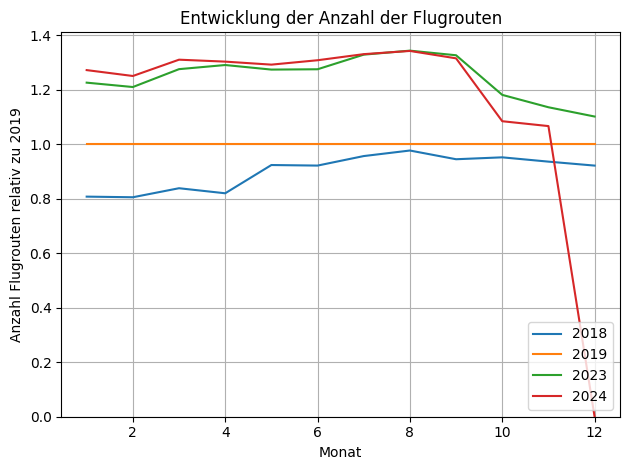

In [58]:
# Group data by year
fig, ax = plt.subplots()  # Create a figure and an axes object

for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Normalize 'neroute' values with respect to 2019 values
    # Match months for normalization
    normalized_neroute = []
    for month in year_data['Month']:
      try:
          norm_factor = df_2019[df_2019['Month'] == month]['neroute'].iloc[0]
          if norm_factor != 0:  # avoid division by zero
             normalized_neroute.append(year_data[year_data['Month'] == month]['neroute'].iloc[0] / norm_factor)
          else:
              normalized_neroute.append(0) # or handle the zero case differently
      except IndexError: #handle months that do not exist in 2019 data
          normalized_neroute.append(0)


    # Plot normalized neroute vs. month for the current year
    ax.plot(year_data['Month'], normalized_neroute, label=str(year))

# Add labels and title
ax.set_xlabel('Monat')
plt.ylabel('Anzahl Flugrouten relativ zu 2019')
plt.title('Entwicklung der Anzahl der Flugrouten')
ax.grid(True)
ax.set_ylim(bottom=0)

# Sort legend labels
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1])) # Sort based on year
handles, labels = zip(*sorted_handles_labels)

# Place legend in the bottom right corner
ax.legend(handles, labels, loc='lower right')


plt.tight_layout()

filetitle="combi_neroute_sorted_legend"
timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}_{timestamp}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}_{timestamp}.svg"
plt.savefig(resultfilename)

plt.show()

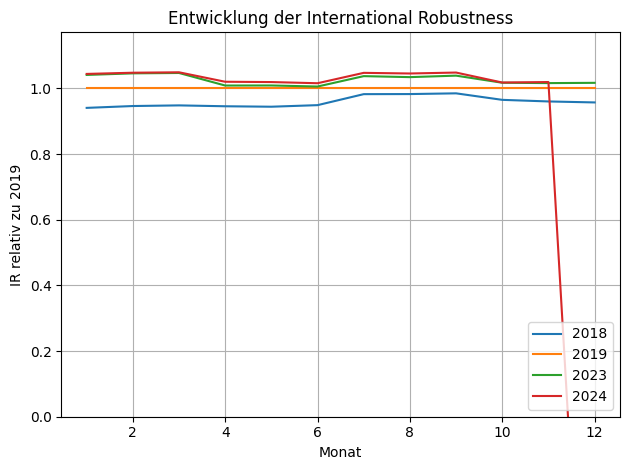

In [59]:
# Group data by year
fig, ax = plt.subplots()  # Create a figure and an axes object

for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Normalize 'IR' values with respect to 2019 values
    # Match months for normalization
    normalized_IR = []
    for month in year_data['Month']:
      try:
          norm_factor = df_2019[df_2019['Month'] == month]['IR'].iloc[0]
          if norm_factor != 0:  # avoid division by zero
             normalized_IR.append(year_data[year_data['Month'] == month]['IR'].iloc[0] / norm_factor)
          else:
              normalized_IR.append(0) # or handle the zero case differently
      except IndexError: #handle months that do not exist in 2019 data
          normalized_IR.append(0)


    # Plot normalized IR vs. month for the current year
    ax.plot(year_data['Month'], normalized_IR, label=str(year))

# Add labels and title
ax.set_xlabel('Monat')
ax.set_ylabel('IR relativ zu 2019')
ax.set_title('Entwicklung der International Robustness')
ax.grid(True)
ax.set_ylim(bottom=0)

# Sort legend labels
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1])) # Sort based on year
handles, labels = zip(*sorted_handles_labels)

# Place legend in the bottom right corner
ax.legend(handles, labels, loc='lower right')


plt.tight_layout()

filetitle="combi_IR_sorted_legend"
timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}_{timestamp}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}_{timestamp}.svg"
plt.savefig(resultfilename)

plt.show()